# Python Data Anaysis Capstone Project

## Overview:





**Is there a conflict of interest for a website like Fandango that both sells movie tickets and displays review ratings?**


Through this analysis project, I explore, analyze and visualize the data through various EDA and visualization methods using a number of Python libraries like Numpy, Pandas, Matplotlib and Seaborn, and see if I can draw out the same conclusion.

**Original Article**:

Be Suspicious Of Online Movie Ratings, Especially Fandango’s: https://fivethirtyeight.com/features/fandango-movies-ratings/

## Data:

The data behind the above story used for this project: https://github.com/fivethirtyeight/data/tree/master/fandango  

1. **fandango_scrape.csv**
2. **fandango_score_comparison.csv**



1. **`fandango_scrape.csv`**

Contains every film FiveThirtyEight pulled from Fandango.

Column | Definiton
:--- |:---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango rating Value for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.



2. **`fandango_score_comparison.csv`** 

Contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.



Column | Definition
:--- |:-----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic                                                
IMDB_user_vote_count | The number of user votes the film had on IMDb




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA of `fandango_scrape.csv`

In [2]:
df_fandango = pd.read_csv("fandango_scrape.csv")

### 1. A. DataFrame Properties and Head:

In [3]:
df_fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
df_fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [26]:
df_fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### 1.B. Univariate Analysis:

#### 1.B.1 **Count of movies per year**:

In [23]:
# Splitting Year from FILM column

title = 'Film Title Name (Year)'
title.split('(')[-1].replace(')','')

'Year'

In [24]:
# Creating a new column YEAR

df_fandango['YEAR'] = df_fandango['FILM'].apply(lambda title : title.split('(')[-1].replace(')',''))

In [25]:
df_fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


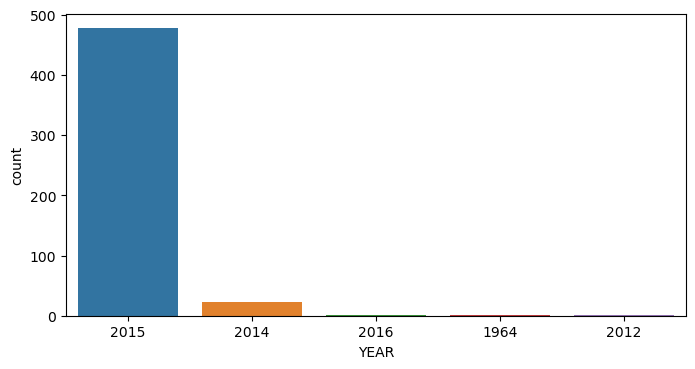

In [22]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df_fandango, x='YEAR');

In [29]:
df_fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

#### 1.B.2 **List of top 10 movies with the highest number of votes**:

In [31]:
df_fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


#### 1.B.3 **Count of movies with zero votes**:

In [33]:
len(df_fandango[df_fandango['VOTES']==0])

69

#### 1.B.4 **Creating a DataFrame removing the films with zero votes**:

In [34]:
fandango_with_votes = df_fandango[df_fandango['VOTES']>0]

In [37]:
len(fandango_with_votes)

435

In [53]:
# Number check:

504 - 69

435

### 1.C. Bivariate Analysis:

#### 1.C.1 **Correlation Analysis**:

In [45]:
df_fandango.corr() 

# STARS and RATINGS are not perfectly correlated as STARS seem to be rounded up from RATINGS value.

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### 1.C.2 **Relationship between the popularity of a film (VOTES) and it's rating (RATING)**:

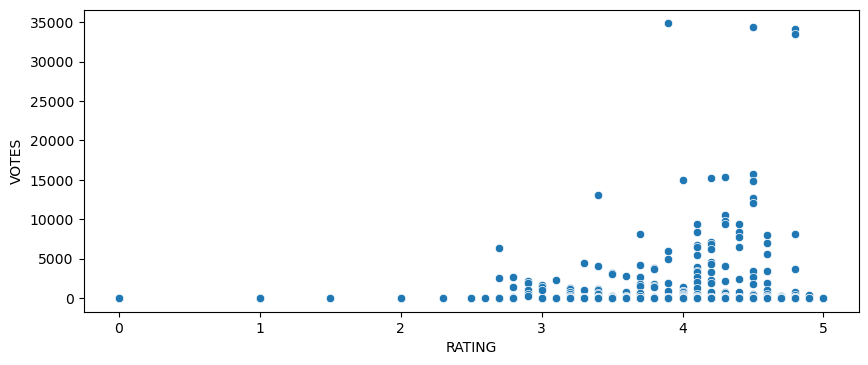

In [49]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=df_fandango, x='RATING', y='VOTES');

# There seems to a moderately positive correlation between rating and votes.

#### 1.C.3 **Analysis of the distribution of displayed ratings (STARS) and the true rating from votes (RATING):**

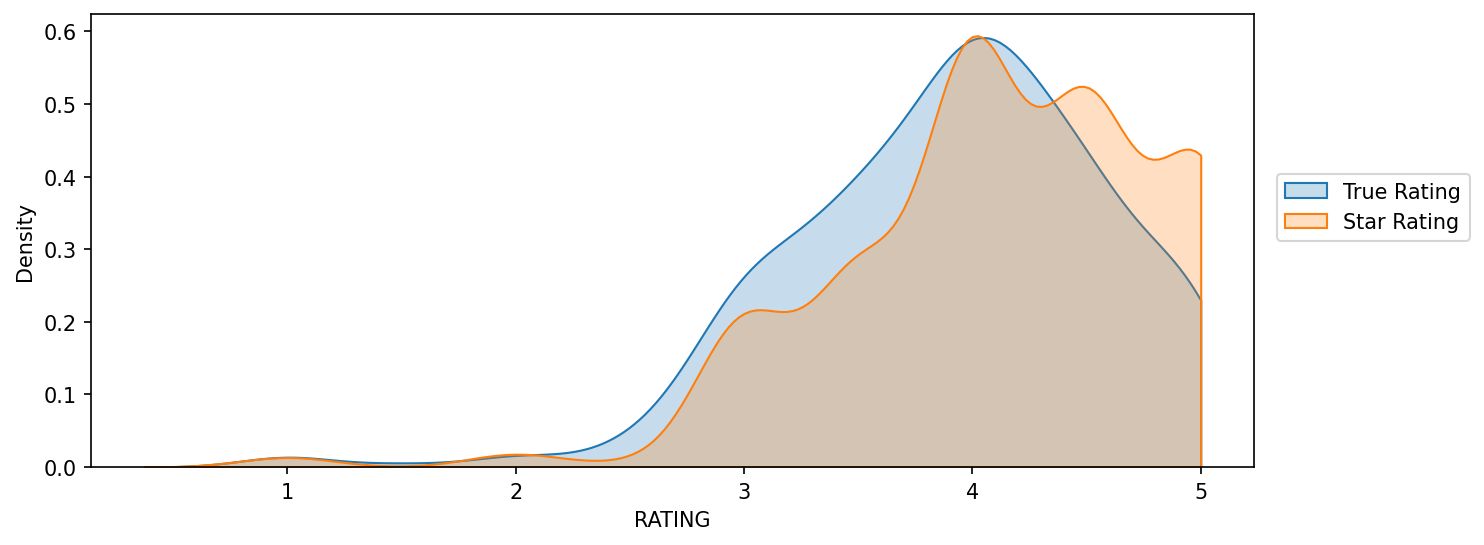

In [70]:
plt.figure(figsize=(10,4),dpi=150)

sns.kdeplot(data=fandango_with_votes, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fandango_with_votes, x='STARS', clip=[0,5], fill=True, label='Star Rating')

plt.legend(loc=[1.02,0.5])


#We see that the Star Rating is slightly skewed to the right because the Rating is usually rounded off to the next whole 
#number when displayed in Stars.

#### 1.C.3 **Quantifying the difference between (STARS) and (RATING):**

In [65]:
fandango_with_votes['STARS_DIFF'] = (fandango_with_votes['STARS'] - fandango_with_votes['RATING']).round(2)

C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
fandango_with_votes.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


#### 1.C.4 **Visualizing the number of times the difference between (STARS) and (RATING) occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

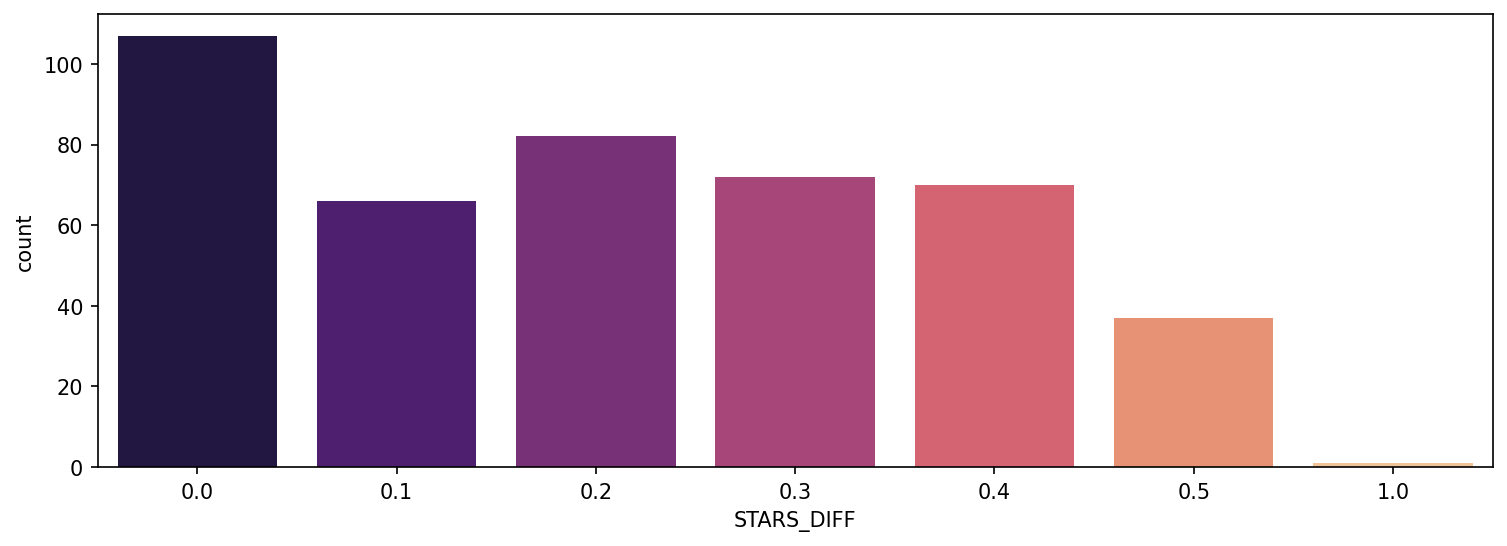

In [71]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fandango_with_votes, x='STARS_DIFF', palette='magma')

# We see from the plot that Fandango was displaying over a 1 star difference for a m oviethan the true rating 
# in the backend.

In [73]:
fandango_with_votes[fandango_with_votes['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## 2. EDA of `fandango_score_comparison.csv`

### 2. A. DataFrame Properties and Head:

In [74]:
fandango_all_sites = pd.read_csv('fandango_score_comparison.csv')

In [75]:
fandango_all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [76]:
fandango_all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [77]:
fandango_all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### 2.B. ROTTEN TOMATOES:

#### 2.B.1 **Visualizing the relationship between RT Critic reviews and RT User reviews:**

(0.0, 100.0)

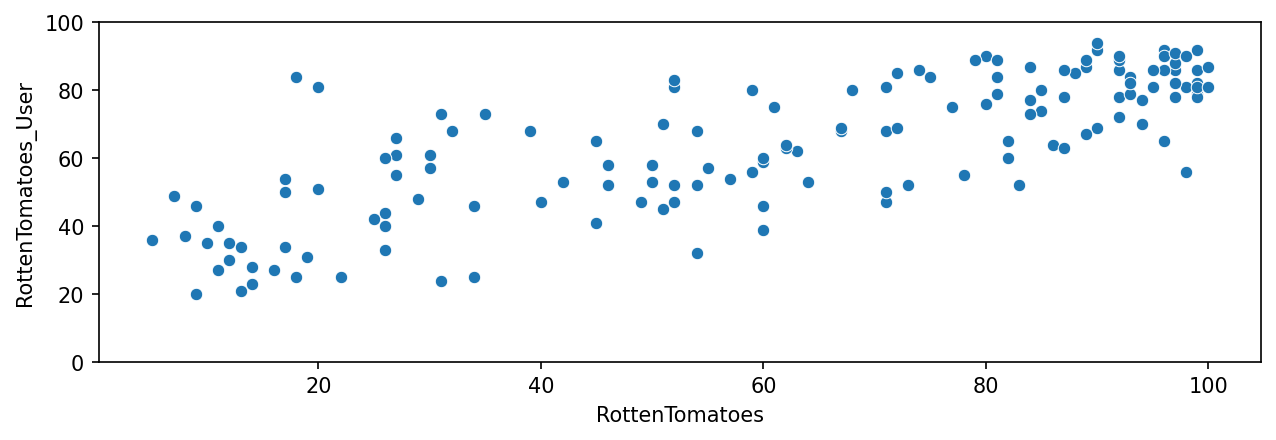

In [79]:
plt.figure(figsize=(10,3),dpi=150)
sns.scatterplot(data=fandango_all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)

#### 2.B.2. **Calcuating the difference between RT Critic reviews and RT User reviews:**

In [80]:
fandango_all_sites['Rotten_Diff'] = fandango_all_sites['RottenTomatoes'] - fandango_all_sites['RottenTomatoes_User']

In [81]:
fandango_all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


#### 2.B.3. **Calculate the Mean Absolute Difference between RT Critic scores and RT User scores as described above.**

In [82]:
fandango_all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

#### 2.B.4.  **Visualizing the distribution of the difference between RT Critics Score and RT User Score (Rotten_Diff)**

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

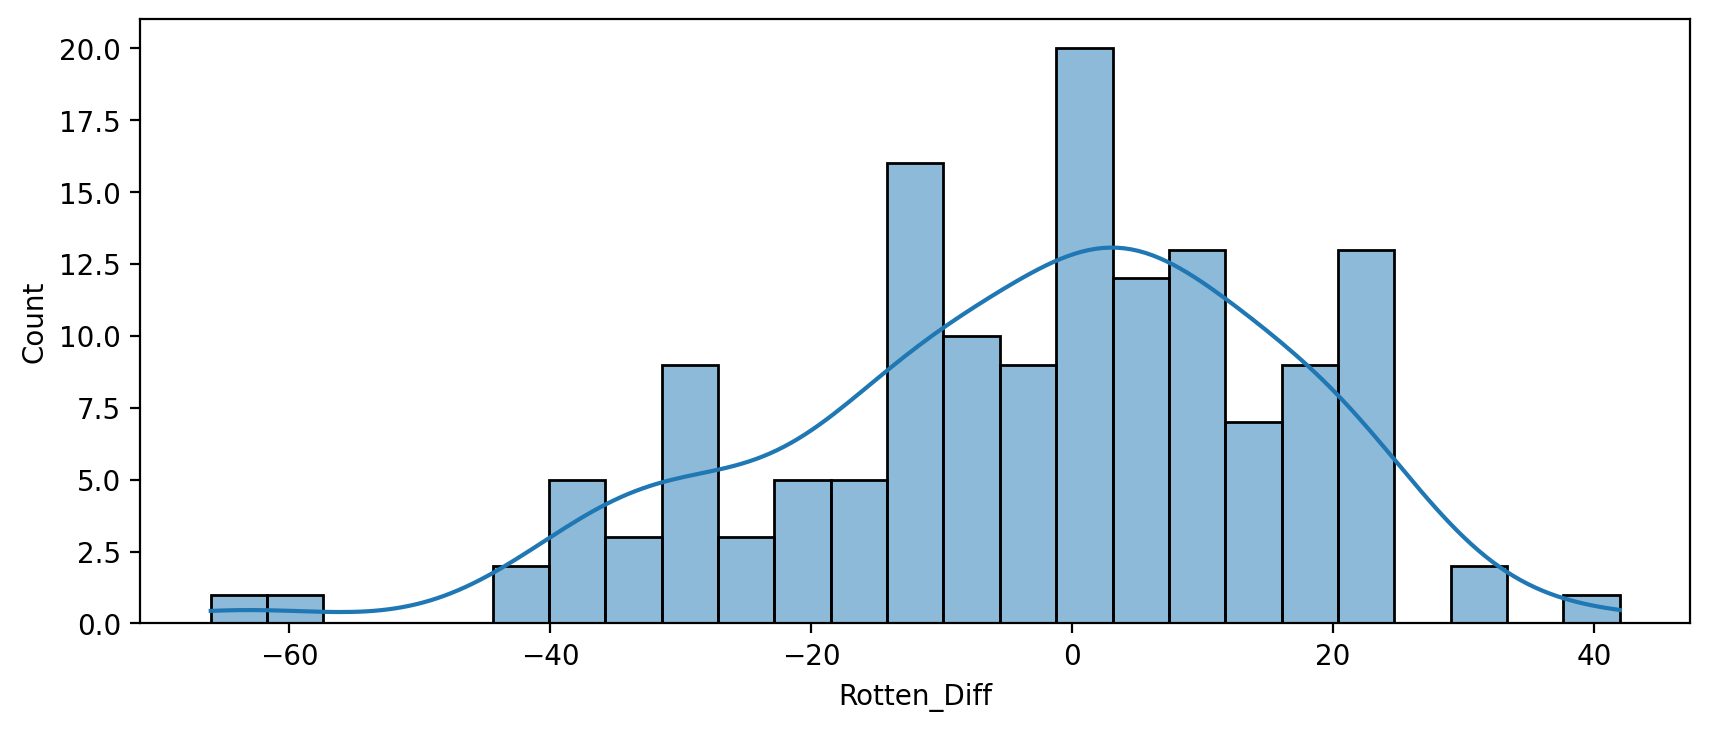

In [85]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=fandango_all_sites,x='Rotten_Diff', kde=True, bins=25)

# We see on the far left there are a few movies that the users really liked than the critics and vice versa on the right. 

#### 2.B.5.  **Visualizing the distribution of the absolute value difference between RT Critics Score and RT User Score**

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

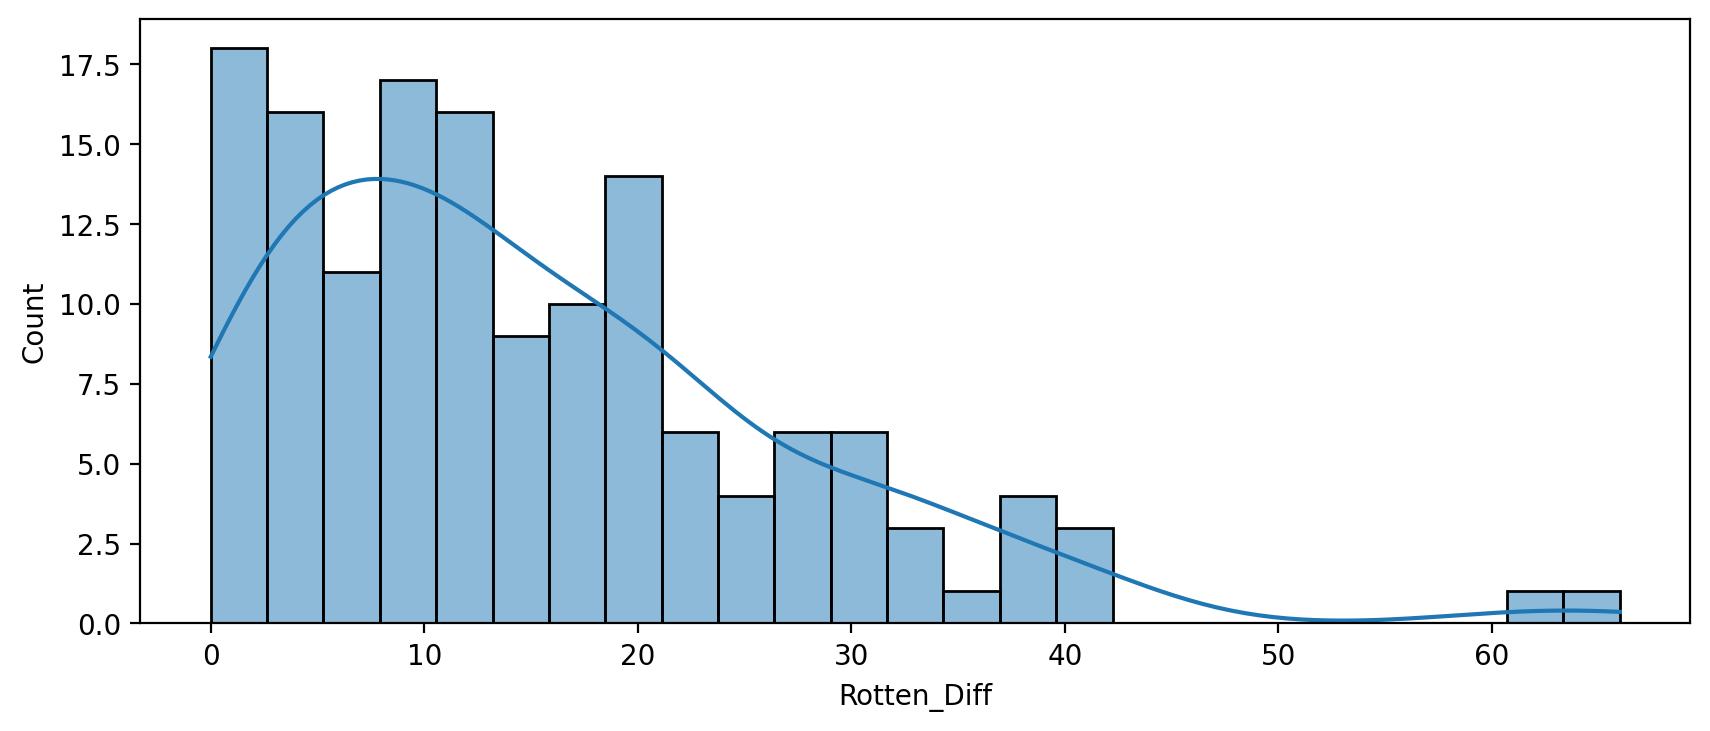

In [86]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=fandango_all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

#### 2.B.6. **Top 5 movies users rated higher than critics on average:**

In [88]:
print("\nMovies Users Loved but Critics Hated")
fandango_all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


Movies Users Loved but Critics Hated


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


#### 2.B.7. **Top 5 movies critics rated higher than users on average:**

In [89]:
print("\nMovies Critics Loved but Users Hated")
fandango_all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


Movies Critics Loved but Users Hated


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### 2.C. METACRITIC:

#### 2.B.1 **Visualizing the relationship between MetaCritic reviews and MetaCritic User reviews:**

(0.0, 10.0)

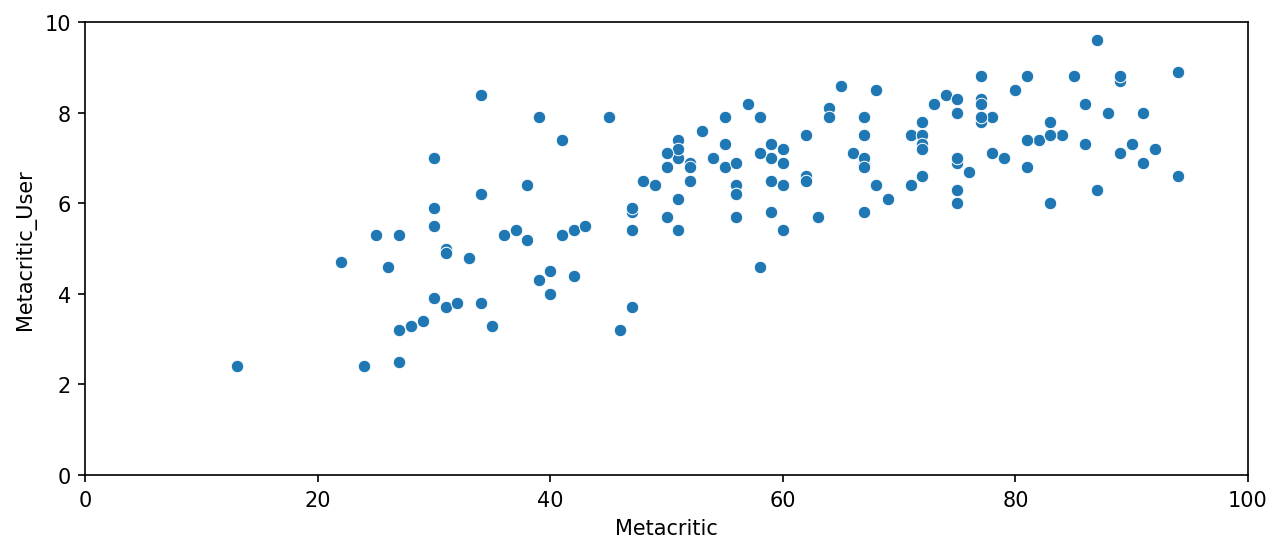

In [90]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango_all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

### 2.D. IMDB:

#### 2.D.1 **Visualizing the relationship between vote counts on MetaCritic versus vote counts on IMDB:**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

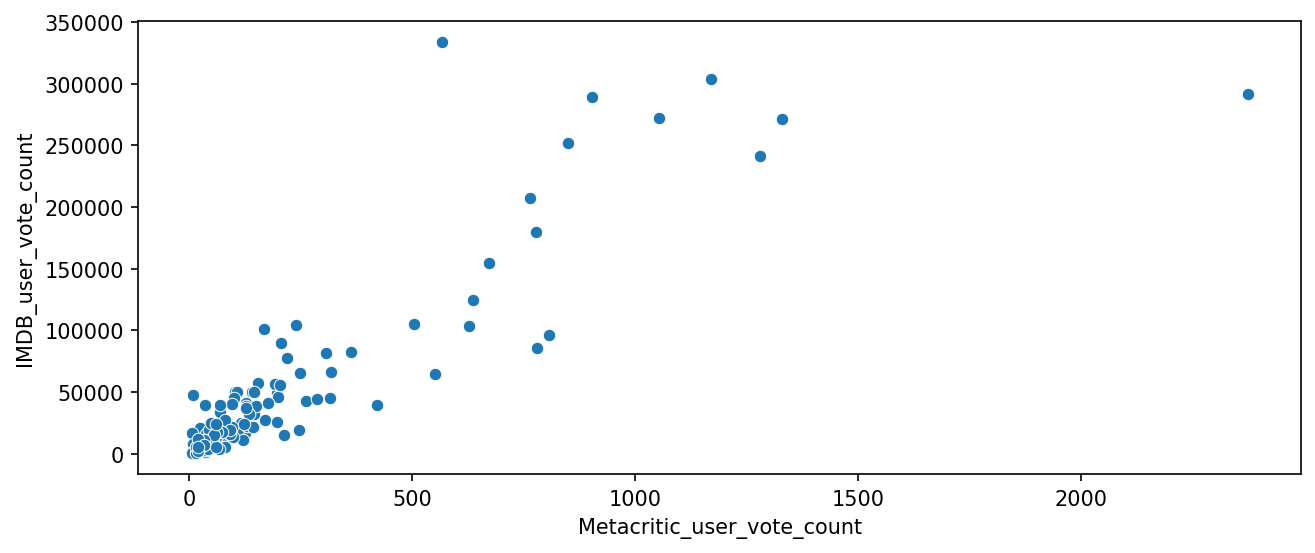

In [95]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango_all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')
#plt.xlim(0,100)
#plt.ylim(0,10)

# There are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.

#### 2.D.2 **Movie that has the highest IMDB vote count:**

In [96]:
fandango_all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


#### 2.D.3 **Movie that has the highest MetaCritic vote count:**

In [97]:
fandango_all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## 3. Fandago Scores vs. All Sites:

**Final exploration of whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales:**

#### 3.A.1 **Merging the DataFrames to compare only movies that are in both DataFrames:**

In [100]:
len(df_fandango)

504

In [101]:
len(fandango_all_sites)

146

In [102]:
df = pd.merge(df_fandango, fandango_all_sites, on='FILM', how='inner')

In [104]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


#### 3.A.2. Normalizing columns to Fandango STARS and RATINGS (0-5): 

In [105]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [106]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1) # dividing by twenty because we need rating out of 5.
df['RT_U_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [107]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1) # Ratings go 1 - 10

In [108]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [109]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


#### 3.A.3. Creating a new DataFrame with the normalized columns and the original STARS and RATINGS columns (0-5):

In [110]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RT_U_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [111]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RT_U_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [112]:
norm_scores.head()

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


#### 3.A.4. Comparing Distribution of Scores Across Sites

https://github.com/mwaskom/seaborn/issues/2280

In [129]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

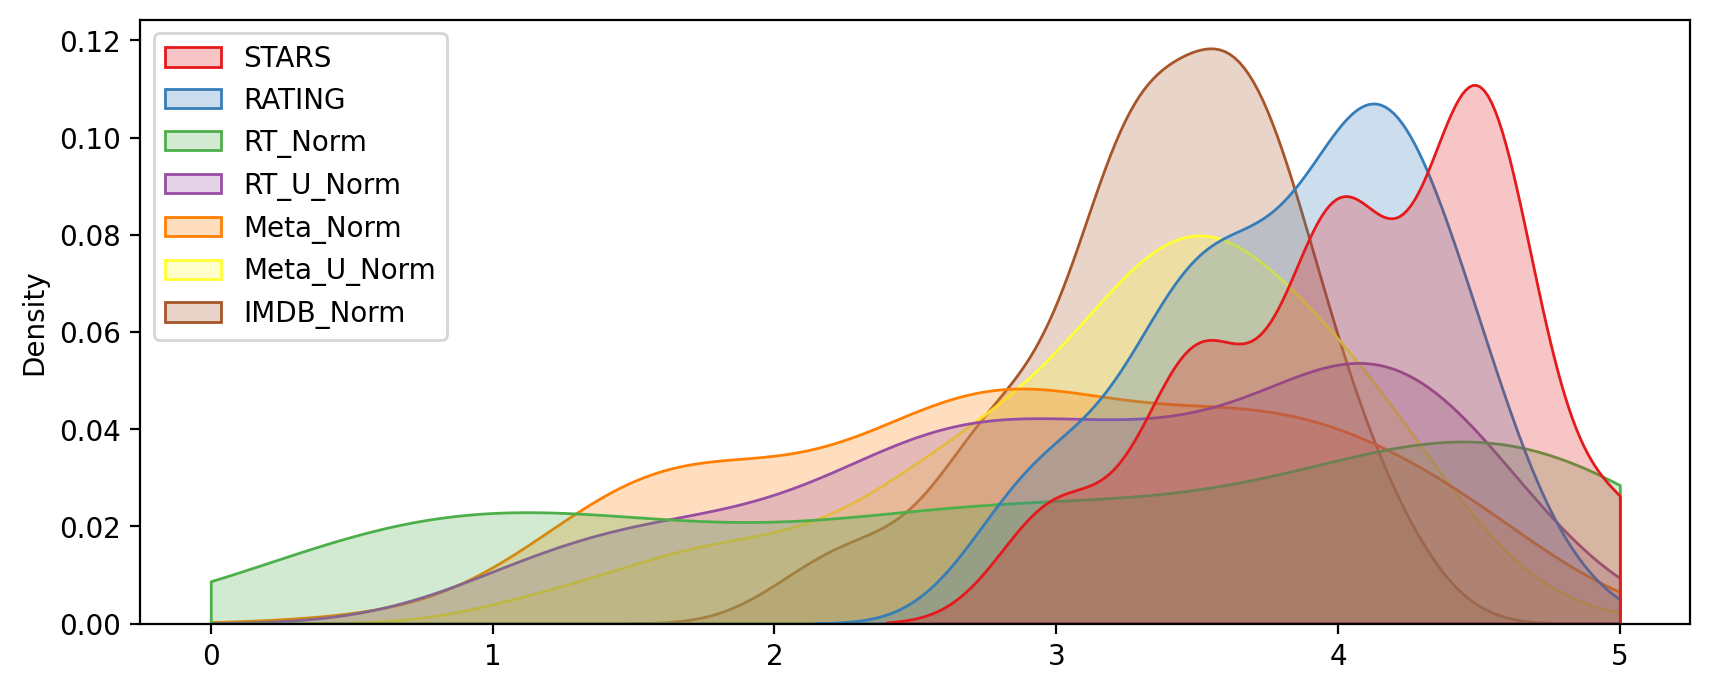

In [130]:
fig, ax = plt.subplots(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores, shade=True, clip=[0,5], palette='Set1')
move_legend(ax, "upper left")

# Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution.

#### 3.A.5. Comparing Distribution of RT critic ratings against the STARS displayed by Fandango:

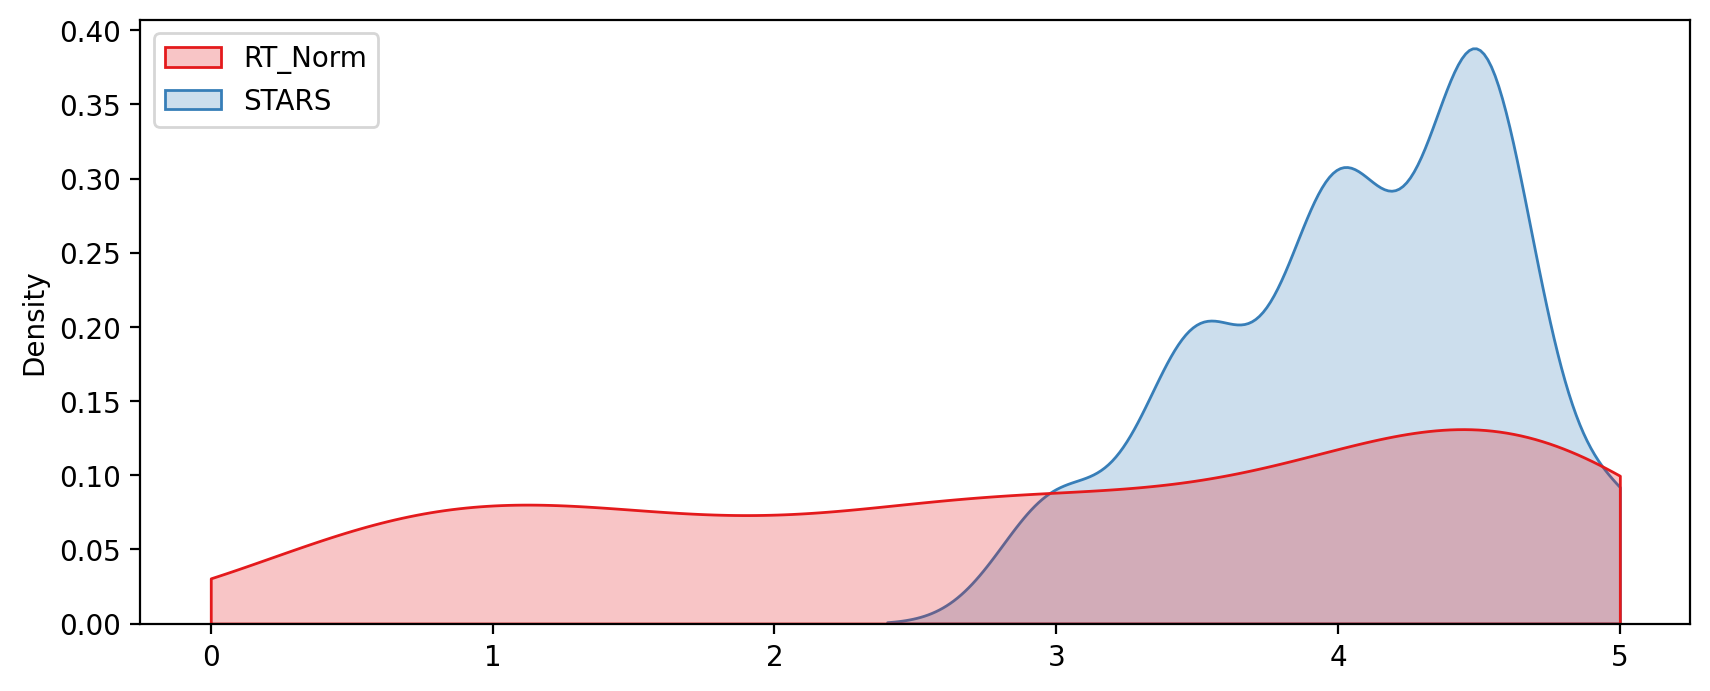

In [131]:
fig, ax = plt.subplots(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']] , shade=True, clip=[0,5], palette='Set1')
move_legend(ax, "upper left")

#### 3.A.6. Histplot comparing all normalized scores:

<AxesSubplot:ylabel='Count'>

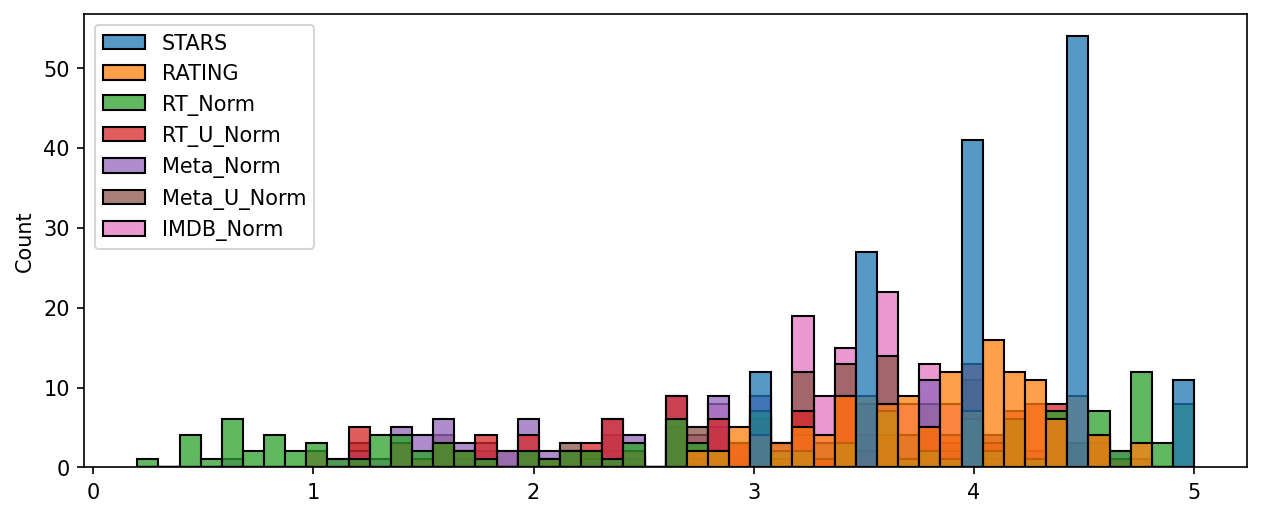

In [140]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(norm_scores, bins=50)

#### 3.A.7. How the worst movies are rated across all platforms:

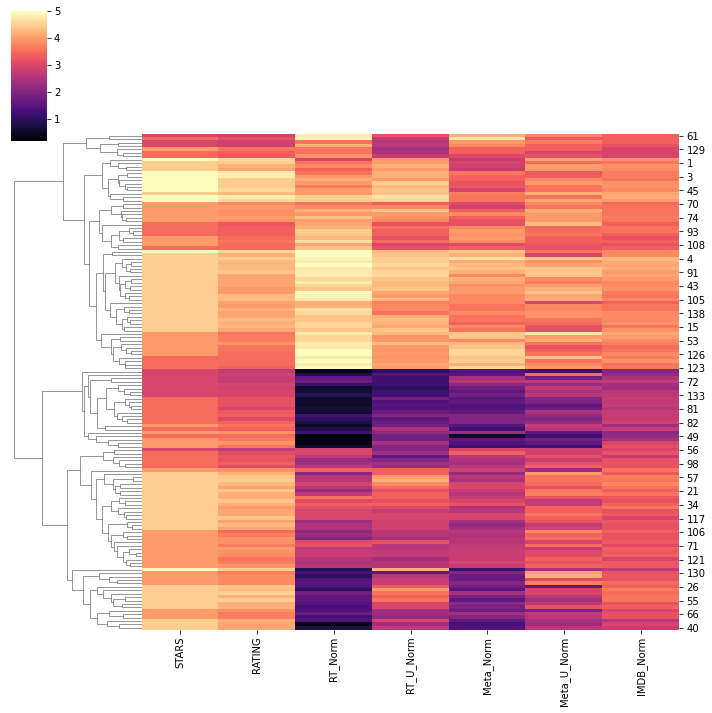

In [150]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

#### 3.A.8. Top 10 Worst Movies:

In [146]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RT_U_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [147]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RT_U_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [148]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

In [149]:
worst_films

,FILM,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


#### 3.A.9. Visualizing the distribution of ratings across all sites for the top 10 worst movies:

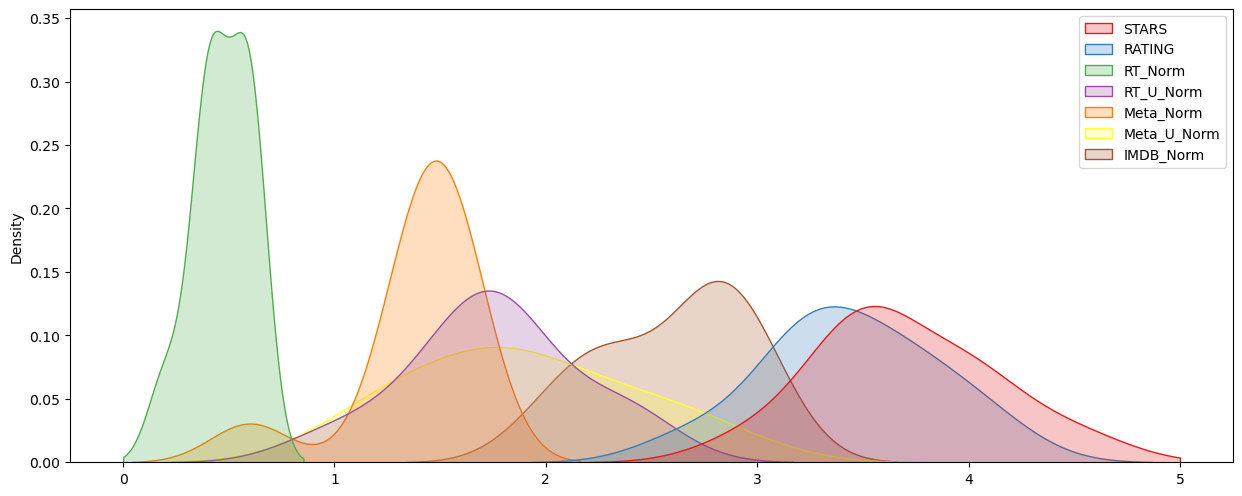

In [152]:
fig, ax = plt.subplots(figsize=(15,6), dpi=100)
sns.kdeplot(data= worst_films, shade=True, clip=[0,5], palette='Set1')
move_legend(ax, "upper right")

In [155]:
worst_films.nlargest(1,'STARS').loc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RT_U_Norm                 2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
Name: 25, dtype: object

---
----


<img src="https://m.media-amazon.com/images/M/MV5BNjM5MDU3NTY0M15BMl5BanBnXkFtZTgwOTk2ODU2MzE@._V1_UX182_CR0,0,182,268_AL_.jpg">


1. **Fandango is showing around 3-4 star ratings for films that below average, and skewing the ratings for ticket sales.**
2. **The biggest outlier is Taken 3, where Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across all the other platforms**